In [1]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df = df.rename({'DEATH_EVENT':'death'},axis=1)

In [6]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
df.to_csv('new.csv') #to save/download your current csv file in your device

In [8]:
df.death.value_counts()

0    203
1     96
Name: death, dtype: int64

<AxesSubplot:xlabel='count', ylabel='death'>

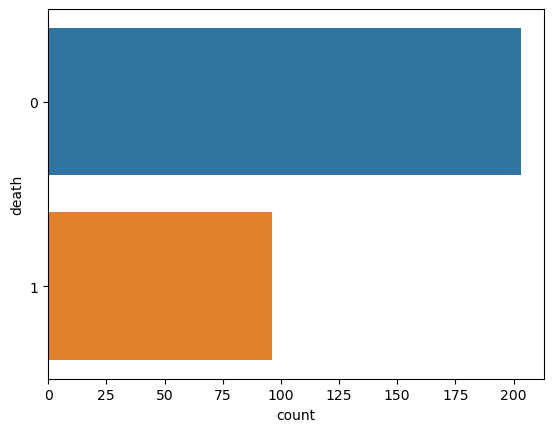

In [9]:
sns.countplot(y='death',data=df)

<AxesSubplot:xlabel='death', ylabel='count'>

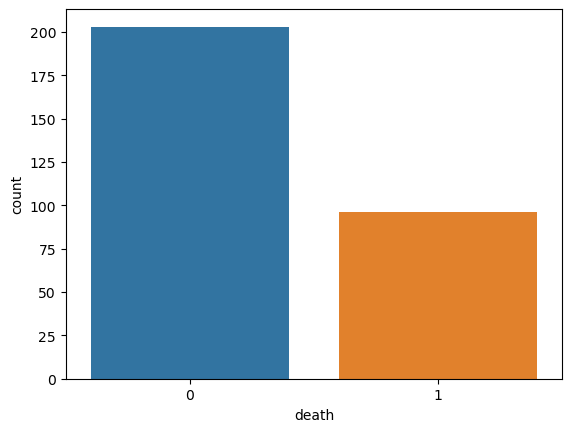

In [10]:
sns.countplot(x='death',data=df)

(<AxesSubplot:xlabel='diabetes', ylabel='count'>,)

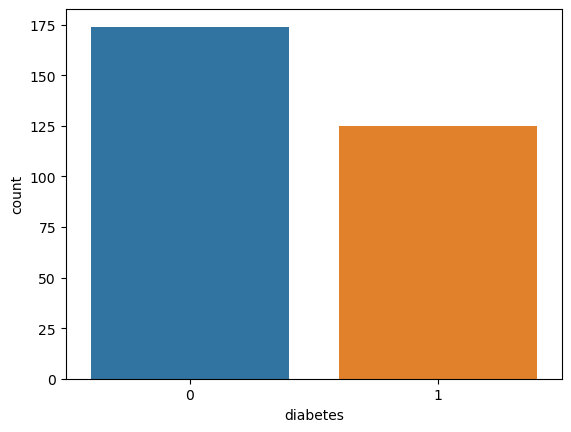

In [11]:
sns.countplot(x='diabetes', data=df) , #='death')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

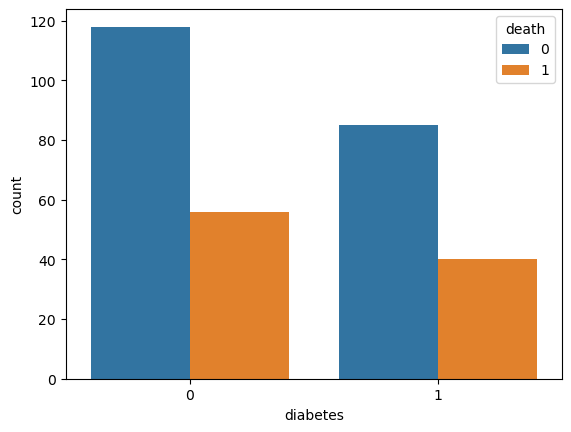

In [12]:
sns.countplot(x='diabetes', data=df, hue='death')

In [13]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

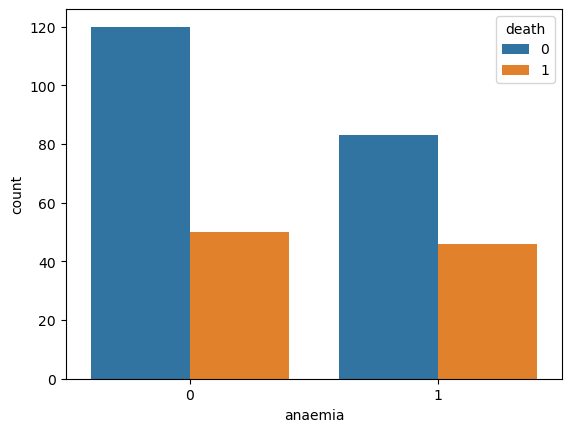

In [14]:
sns.countplot(x='anaemia', data=df, hue='death')

In [15]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

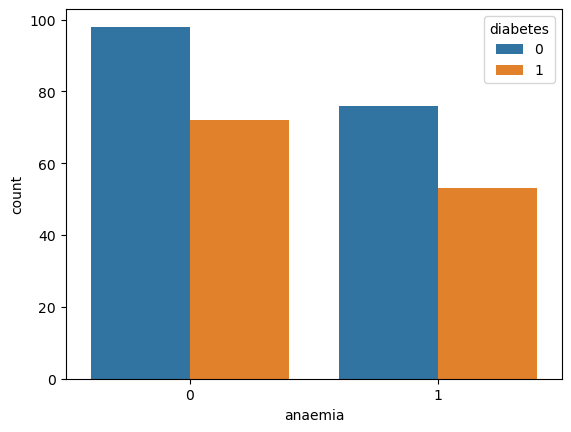

In [16]:
sns.countplot(x='anaemia', data=df, hue='diabetes')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

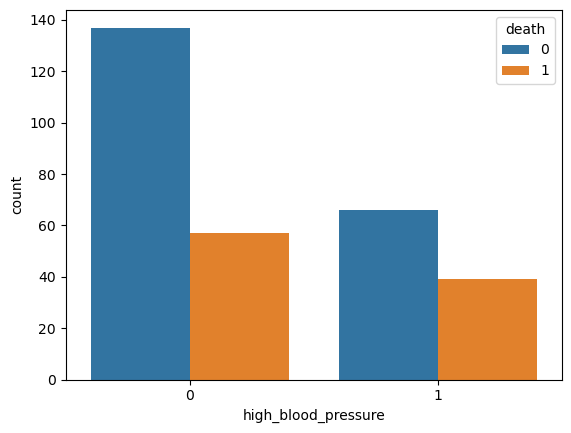

In [17]:
sns.countplot(x='high_blood_pressure', data=df, hue='death')

In [18]:
x = df.drop('death',axis=1)

In [19]:
y = df['death']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70, random_state=42)

In [22]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [23]:
ytest.shape

(90,)

In [24]:
xtest.shape

(90, 12)

# Apply Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier()

In [27]:
dt.fit(xtrain,ytrain) #train the model with 70% of data from dataset

DecisionTreeClassifier()

In [28]:
pred = dt.predict(xtest) # pred is corrsponding to ytest

In [29]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [30]:
pred # Predicted value of Y

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [31]:
import numpy as np
np.array(ytest) # Actual Value of Y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [32]:
dt.score(xtest,ytest)

0.7

# Evaluate the ML model

In [33]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [34]:
classification_report(ytest,pred) 

'              precision    recall  f1-score   support\n\n           0       0.72      0.79      0.76        53\n           1       0.66      0.57      0.61        37\n\n    accuracy                           0.70        90\n   macro avg       0.69      0.68      0.68        90\nweighted avg       0.70      0.70      0.70        90\n'

In [35]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76        53
           1       0.66      0.57      0.61        37

    accuracy                           0.70        90
   macro avg       0.69      0.68      0.68        90
weighted avg       0.70      0.70      0.70        90



In [36]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [37]:
test_confusion_matrix

array([[42, 11],
       [16, 21]], dtype=int64)

<AxesSubplot:>

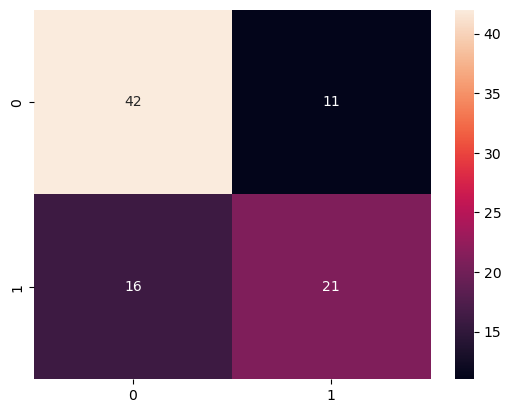

In [38]:
sns.heatmap(test_confusion_matrix, annot=True)

In [39]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1)

In [40]:
dt.score(xtest,ytest)

0.7

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier() # default parameters

In [43]:
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [44]:
clf.score(xtest, ytest)

0.7555555555555555

# Some dataset for practice

In [45]:
#https://scikit-learn.org/stable/datasets/toy_dataset.html
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
#https://scikit-learn.org/stable/datasets/real_world.html

# Hyper Parameter Tuning

In [46]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.RandomizedSearchCV.html

# Randomized Search CV

In [47]:
# creating param_distributions for random forest
import numpy as np
trees = np.random.randint(15,150,30)

In [48]:
trees

array([112,  65,  19, 137,  32,  41,  90,  30, 101,  62, 114, 100, 148,
        99, 104,  48, 108,  36,  57, 143,  53,  43,  83, 134,  68, 115,
        57,  88,  63,  75])

In [49]:
max_features = ['sqrt','log2']
max_depth = np.random.randint(2,12,50)
criterion = ['gini','entropy']
min_samples_split = [2,3,4]

grids = {
    'n_estimators' : trees,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'criterion' : criterion,
    'min_samples_split' : min_samples_split
}

In [50]:
print(grids)

{'n_estimators': array([112,  65,  19, 137,  32,  41,  90,  30, 101,  62, 114, 100, 148,
        99, 104,  48, 108,  36,  57, 143,  53,  43,  83, 134,  68, 115,
        57,  88,  63,  75]), 'max_features': ['sqrt', 'log2'], 'max_depth': array([ 2,  7,  2,  7, 10,  2,  7,  3,  4,  6,  9,  9, 10,  6,  4, 11, 11,
        4, 10,  4,  3, 11,  2,  4,  6,  9,  3,  8,  5, 11,  2, 11,  5,  5,
       11,  6,  9,  9,  9,  8,  2, 10, 11,  8,  5,  4,  8, 10,  4,  9]), 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4]}


In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
rcv = RandomizedSearchCV(clf, grids, n_iter=1000, cv=3)

In [53]:
rcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=1000,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  7,  2,  7, 10,  2,  7,  3,  4,  6,  9,  9, 10,  6,  4, 11, 11,
        4, 10,  4,  3, 11,  2,  4,  6,  9,  3,  8,  5, 11,  2, 11,  5,  5,
       11,  6,  9,  9,  9,  8,  2, 10, 11,  8,  5,  4,  8, 10,  4,  9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([112,  65,  19, 137,  32,  41,  90,  30, 101,  62, 114, 100, 148,
        99, 104,  48, 108,  36,  57, 143,  53,  43,  83, 134,  68, 115,
        57,  88,  63,  75])})

In [54]:
rcv.cv_results_

{'mean_fit_time': array([0.07523402, 0.03943674, 0.07794722, 0.0443635 , 0.05064162,
        0.09861167, 0.01354591, 0.03610826, 0.06621766, 0.0613776 ,
        0.09320792, 0.09457207, 0.02796046, 0.04173676, 0.04885213,
        0.04141442, 0.02774469, 0.03133464, 0.04248643, 0.04524183,
        0.0433321 , 0.0145882 , 0.02629352, 0.0795296 , 0.06477722,
        0.06669601, 0.04158036, 0.04060221, 0.09257929, 0.0773503 ,
        0.06878853, 0.04471493, 0.08495911, 0.06914632, 0.0352753 ,
        0.04895647, 0.05970351, 0.07402643, 0.0789667 , 0.07185046,
        0.04437963, 0.02269355, 0.02289422, 0.09123294, 0.06770269,
        0.01364811, 0.06917024, 0.02263689, 0.05855926, 0.08697319,
        0.04699961, 0.03913816, 0.06144659, 0.04539696, 0.027282  ,
        0.04674689, 0.07165432, 0.07642404, 0.02631179, 0.05653652,
        0.03720379, 0.04328275, 0.04495732, 0.05049332, 0.07403739,
        0.06400021, 0.0713009 , 0.03817415, 0.0133876 , 0.04194188,
        0.04542383, 0.06825097,

In [55]:
tuning_result = pd.DataFrame(rcv.cv_results_)

In [56]:
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.075234,0.001193,0.007983,0.000761,112,3,log2,9,gini,"{'n_estimators': 112, 'min_samples_split': 3, ...",0.814286,0.928571,0.855072,0.865977,0.047290,457
1,0.039437,0.000626,0.004731,0.000354,57,4,log2,3,gini,"{'n_estimators': 57, 'min_samples_split': 4, '...",0.800000,0.942857,0.855072,0.865977,0.058829,457
2,0.077947,0.001193,0.008276,0.000748,115,4,sqrt,9,entropy,"{'n_estimators': 115, 'min_samples_split': 4, ...",0.828571,0.957143,0.826087,0.870600,0.061203,428
3,0.044363,0.000193,0.004664,0.000691,65,2,log2,6,entropy,"{'n_estimators': 65, 'min_samples_split': 2, '...",0.842857,0.942857,0.855072,0.880262,0.044541,54
4,0.050642,0.000800,0.005851,0.000629,68,2,log2,11,entropy,"{'n_estimators': 68, 'min_samples_split': 2, '...",0.842857,0.900000,0.855072,0.865977,0.024570,457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.013541,0.000006,0.001671,0.000473,19,3,log2,10,entropy,"{'n_estimators': 19, 'min_samples_split': 3, '...",0.814286,0.942857,0.855072,0.870738,0.053645,286
996,0.041963,0.000183,0.004346,0.000237,63,4,sqrt,6,entropy,"{'n_estimators': 63, 'min_samples_split': 4, '...",0.828571,0.942857,0.840580,0.870669,0.051279,362
997,0.084624,0.000436,0.008370,0.000232,134,4,sqrt,5,gini,"{'n_estimators': 134, 'min_samples_split': 4, ...",0.785714,0.942857,0.840580,0.856384,0.065119,786
998,0.086830,0.000016,0.007899,0.000272,137,4,log2,6,gini,"{'n_estimators': 137, 'min_samples_split': 4, ...",0.800000,0.928571,0.855072,0.861215,0.052668,628


In [57]:
rcv.best_score_

0.8946169772256729

In [58]:
rcv.best_params_

{'n_estimators': 62,
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'max_depth': 11,
 'criterion': 'entropy'}

In [59]:
clf2 = rcv.best_estimator_

In [60]:
clf2.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_split=3, n_estimators=62)

In [61]:
clf2.score(xtest, ytest)

0.7555555555555555

In [62]:
clf2

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_split=3, n_estimators=62)

# Grid Search CV

In [63]:
from sklearn.model_selection import GridSearchCV

In [65]:
gc = GridSearchCV(clf, grids,cv=3)
gc.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  7,  2,  7, 10,  2,  7,  3,  4,  6,  9,  9, 10,  6,  4, 11, 11,
        4, 10,  4,  3, 11,  2,  4,  6,  9,  3,  8,  5, 11,  2, 11,  5,  5,
       11,  6,  9,  9,  9,  8,  2, 10, 11,  8,  5,  4,  8, 10,  4,  9]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([112,  65,  19, 137,  32,  41,  90,  30, 101,  62, 114, 100, 148,
        99, 104,  48, 108,  36,  57, 143,  53,  43,  83, 134,  68, 115,
        57,  88,  63,  75])})

In [66]:
gc.best_score_

0.9042097998619738

In [67]:
gc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 30}

In [68]:
clf2 = gc.best_estimator_

In [71]:
clf2.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       n_estimators=30)

In [72]:
clf2.score(xtest, ytest)

0.7555555555555555

In [73]:
clf2

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       n_estimators=30)

# XGBoost

In [74]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 7.4 MB/s eta 0:00:00


In [78]:
import xgboost as xgb

In [83]:
model = xgb.XGBClassifier()

In [84]:
model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [85]:
model.score(xtest, ytest)

0.7666666666666667

# AdaBoost

In [80]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [81]:
ada.fit(xtrain, ytrain)

AdaBoostClassifier()

In [82]:
ada.score(xtest, ytest)

0.7111111111111111

# CatBoost Classifier

In [91]:
!pip install catboost

     ---------------------------------------- 74.0/74.0 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [92]:
import catboost
from catboost import CatBoostClassifier

In [93]:
cat = CatBoostClassifier()

In [94]:
cat.fit(xtrain, ytrain)

Learning rate set to 0.00528
0:	learn: 0.6889550	total: 143ms	remaining: 2m 23s
1:	learn: 0.6846179	total: 144ms	remaining: 1m 11s
2:	learn: 0.6793649	total: 145ms	remaining: 48.2s
3:	learn: 0.6743186	total: 146ms	remaining: 36.3s
4:	learn: 0.6691854	total: 147ms	remaining: 29.2s
5:	learn: 0.6642615	total: 148ms	remaining: 24.5s
6:	learn: 0.6596169	total: 149ms	remaining: 21.1s
7:	learn: 0.6549722	total: 150ms	remaining: 18.5s
8:	learn: 0.6497661	total: 150ms	remaining: 16.6s
9:	learn: 0.6443772	total: 151ms	remaining: 15s
10:	learn: 0.6395734	total: 152ms	remaining: 13.7s
11:	learn: 0.6339564	total: 153ms	remaining: 12.6s
12:	learn: 0.6300873	total: 154ms	remaining: 11.7s
13:	learn: 0.6256635	total: 155ms	remaining: 10.9s
14:	learn: 0.6218261	total: 156ms	remaining: 10.2s
15:	learn: 0.6172113	total: 157ms	remaining: 9.63s
16:	learn: 0.6132416	total: 157ms	remaining: 9.11s
17:	learn: 0.6087054	total: 158ms	remaining: 8.64s
18:	learn: 0.6042602	total: 159ms	remaining: 8.22s
19:	learn: 0

256:	learn: 0.2224801	total: 389ms	remaining: 1.13s
257:	learn: 0.2217733	total: 391ms	remaining: 1.12s
258:	learn: 0.2214179	total: 392ms	remaining: 1.12s
259:	learn: 0.2210002	total: 393ms	remaining: 1.12s
260:	learn: 0.2205900	total: 394ms	remaining: 1.11s
261:	learn: 0.2200582	total: 395ms	remaining: 1.11s
262:	learn: 0.2193166	total: 396ms	remaining: 1.11s
263:	learn: 0.2188104	total: 397ms	remaining: 1.11s
264:	learn: 0.2184833	total: 398ms	remaining: 1.1s
265:	learn: 0.2180510	total: 399ms	remaining: 1.1s
266:	learn: 0.2174288	total: 400ms	remaining: 1.1s
267:	learn: 0.2168142	total: 402ms	remaining: 1.1s
268:	learn: 0.2162081	total: 403ms	remaining: 1.09s
269:	learn: 0.2159272	total: 404ms	remaining: 1.09s
270:	learn: 0.2153594	total: 405ms	remaining: 1.09s
271:	learn: 0.2149006	total: 406ms	remaining: 1.09s
272:	learn: 0.2144604	total: 407ms	remaining: 1.08s
273:	learn: 0.2140610	total: 408ms	remaining: 1.08s
274:	learn: 0.2136347	total: 409ms	remaining: 1.08s
275:	learn: 0.21

449:	learn: 0.1489533	total: 580ms	remaining: 709ms
450:	learn: 0.1487402	total: 581ms	remaining: 707ms
451:	learn: 0.1484415	total: 582ms	remaining: 706ms
452:	learn: 0.1481344	total: 583ms	remaining: 704ms
453:	learn: 0.1478363	total: 584ms	remaining: 703ms
454:	learn: 0.1476311	total: 585ms	remaining: 701ms
455:	learn: 0.1472821	total: 586ms	remaining: 699ms
456:	learn: 0.1470357	total: 587ms	remaining: 698ms
457:	learn: 0.1467845	total: 588ms	remaining: 696ms
458:	learn: 0.1464442	total: 589ms	remaining: 695ms
459:	learn: 0.1463336	total: 590ms	remaining: 693ms
460:	learn: 0.1460271	total: 591ms	remaining: 691ms
461:	learn: 0.1457620	total: 592ms	remaining: 690ms
462:	learn: 0.1455957	total: 593ms	remaining: 688ms
463:	learn: 0.1453303	total: 594ms	remaining: 687ms
464:	learn: 0.1452163	total: 595ms	remaining: 685ms
465:	learn: 0.1448110	total: 596ms	remaining: 683ms
466:	learn: 0.1444879	total: 597ms	remaining: 682ms
467:	learn: 0.1442566	total: 598ms	remaining: 680ms
468:	learn: 

660:	learn: 0.1063892	total: 782ms	remaining: 401ms
661:	learn: 0.1062091	total: 783ms	remaining: 400ms
662:	learn: 0.1061129	total: 784ms	remaining: 399ms
663:	learn: 0.1059935	total: 785ms	remaining: 397ms
664:	learn: 0.1058532	total: 786ms	remaining: 396ms
665:	learn: 0.1057646	total: 787ms	remaining: 395ms
666:	learn: 0.1056521	total: 788ms	remaining: 394ms
667:	learn: 0.1054640	total: 790ms	remaining: 392ms
668:	learn: 0.1053307	total: 790ms	remaining: 391ms
669:	learn: 0.1052454	total: 791ms	remaining: 390ms
670:	learn: 0.1050920	total: 792ms	remaining: 389ms
671:	learn: 0.1048789	total: 793ms	remaining: 387ms
672:	learn: 0.1047775	total: 794ms	remaining: 386ms
673:	learn: 0.1045871	total: 795ms	remaining: 385ms
674:	learn: 0.1044004	total: 796ms	remaining: 383ms
675:	learn: 0.1042492	total: 797ms	remaining: 382ms
676:	learn: 0.1040648	total: 798ms	remaining: 381ms
677:	learn: 0.1039213	total: 800ms	remaining: 380ms
678:	learn: 0.1037805	total: 801ms	remaining: 378ms
679:	learn: 

855:	learn: 0.0822384	total: 971ms	remaining: 163ms
856:	learn: 0.0821272	total: 972ms	remaining: 162ms
857:	learn: 0.0820085	total: 973ms	remaining: 161ms
858:	learn: 0.0819313	total: 975ms	remaining: 160ms
859:	learn: 0.0818515	total: 976ms	remaining: 159ms
860:	learn: 0.0818090	total: 977ms	remaining: 158ms
861:	learn: 0.0816672	total: 978ms	remaining: 157ms
862:	learn: 0.0815869	total: 979ms	remaining: 155ms
863:	learn: 0.0814664	total: 981ms	remaining: 154ms
864:	learn: 0.0813394	total: 982ms	remaining: 153ms
865:	learn: 0.0812647	total: 983ms	remaining: 152ms
866:	learn: 0.0812116	total: 984ms	remaining: 151ms
867:	learn: 0.0811705	total: 985ms	remaining: 150ms
868:	learn: 0.0810843	total: 986ms	remaining: 149ms
869:	learn: 0.0809429	total: 987ms	remaining: 148ms
870:	learn: 0.0808196	total: 989ms	remaining: 146ms
871:	learn: 0.0807571	total: 990ms	remaining: 145ms
872:	learn: 0.0806836	total: 991ms	remaining: 144ms
873:	learn: 0.0805711	total: 992ms	remaining: 143ms
874:	learn: 

In [95]:
cat.score(xtest, ytest)

0.7555555555555555